# 羅吉斯回歸：熱門歌曲分析

In [2]:
import pandas as pd 
import numpy as np 
import sklearn
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
from matplotlib.pyplot import figure
import statsmodels.formula.api as sm
from sklearn.model_selection import train_test_split
from sklearn import metrics

In [3]:
!pip install statsmodels

^C


## 看看資料

### 匯入資料

In [4]:
data = pd.read_csv('all_song_0527.csv')
data.head(30)

,year,language,artist_name,track_name,track_id,album_name,popularity,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration,time_signature,label
0,2021,華語,告五人,在這座城市遺失了你 (戲劇《他們創業的那些鳥事》插曲),1Ytgo9ipdlTsf6wlg6sXf3,運氣來得若有似無,60,0.460,0.2970,9.0,...,1.0,0.0309,0.6920,0.000318,0.1070,0.1250,180.095,357.094,4.0,1
1,2021,華語,程響,四季予你,4BGkSCrjiLao1bpibNptTD,四季予你,59,0.534,0.5950,3.0,...,1.0,0.0330,0.7500,0.000000,0.1160,0.1870,141.957,248.527,4.0,1
2,2021,華語,Eric Chou,如果能幸福 - HBO Asia原創影集《戒指流浪記》片尾曲,0TVrlU8El0K6U1pC2LOt09,如果能幸福 (HBO Asia原創影集《戒指流浪記》片尾曲),55,0.480,0.3580,0.0,...,1.0,0.0282,0.6220,0.000021,0.1070,0.1420,149.945,259.588,4.0,1
3,2021,華語,WeiBird,"如果可以 - 電影""月老""主題曲",72OVnXDzugvrCU25lMi9au,"如果可以 (電影""月老""主題曲)",71,0.540,0.5400,3.0,...,1.0,0.0290,0.2410,0.000000,0.3510,0.3720,74.969,274.400,4.0,1
4,2021,華語,告五人,唯一 (三立/台視戲劇《戀愛是科學》插曲),19fp9nI0tq0lcBl7XoCHAb,運氣來得若有似無,62,0.485,0.1030,1.0,...,1.0,0.0367,0.9590,0.000053,0.1070,0.2100,140.595,270.761,4.0,1
5,2021,華語,Eric Chou,愛我的時候,6us212S3fCRIQwOwNExqLH,愛我的時候,61,0.453,0.3840,6.0,...,1.0,0.0312,0.8670,0.000000,0.1120,0.1530,75.390,224.400,4.0,1
6,2021,華語,告五人,醜人多作怪 (《新斗羅大陸》手遊半週年主題曲),5nVrrh7PIybgCb7SoM5IZB,運氣來得若有似無,51,0.595,0.7530,6.0,...,0.0,0.0393,0.1740,0.000000,0.1590,0.4660,90.026,257.473,4.0,1
7,2021,華語,艾怡良,我這個人 - 《我沒有談的那場戀愛》電影宣傳主題曲,48QxMLotKqBNQBdH5VBTzj,秋日思念絮語,0,0.395,0.1330,10.0,...,1.0,0.0441,0.9260,0.000000,0.0906,0.2340,142.474,290.023,4.0,1
8,2021,華語,WeiBird,因為是你 - 原創影集《火神的眼淚》片頭曲,0TqOMBOKodVMnr1NgMwOt7,因為是你 (原創影集《火神的眼淚》片頭曲),52,0.429,0.5210,7.0,...,1.0,0.0330,0.4620,0.000064,0.1180,0.2310,149.953,211.420,4.0,1
9,2021,華語,Eric Chou,離開你以後 - 電影《你的婚禮》插曲,4cSCMlCcY65zlz1ZPhqsCe,離開你以後 (電影《你的婚禮》插曲),58,0.240,0.4690,3.0,...,1.0,0.0361,0.7530,0.000002,0.0917,0.2400,154.969,309.840,4.0,1


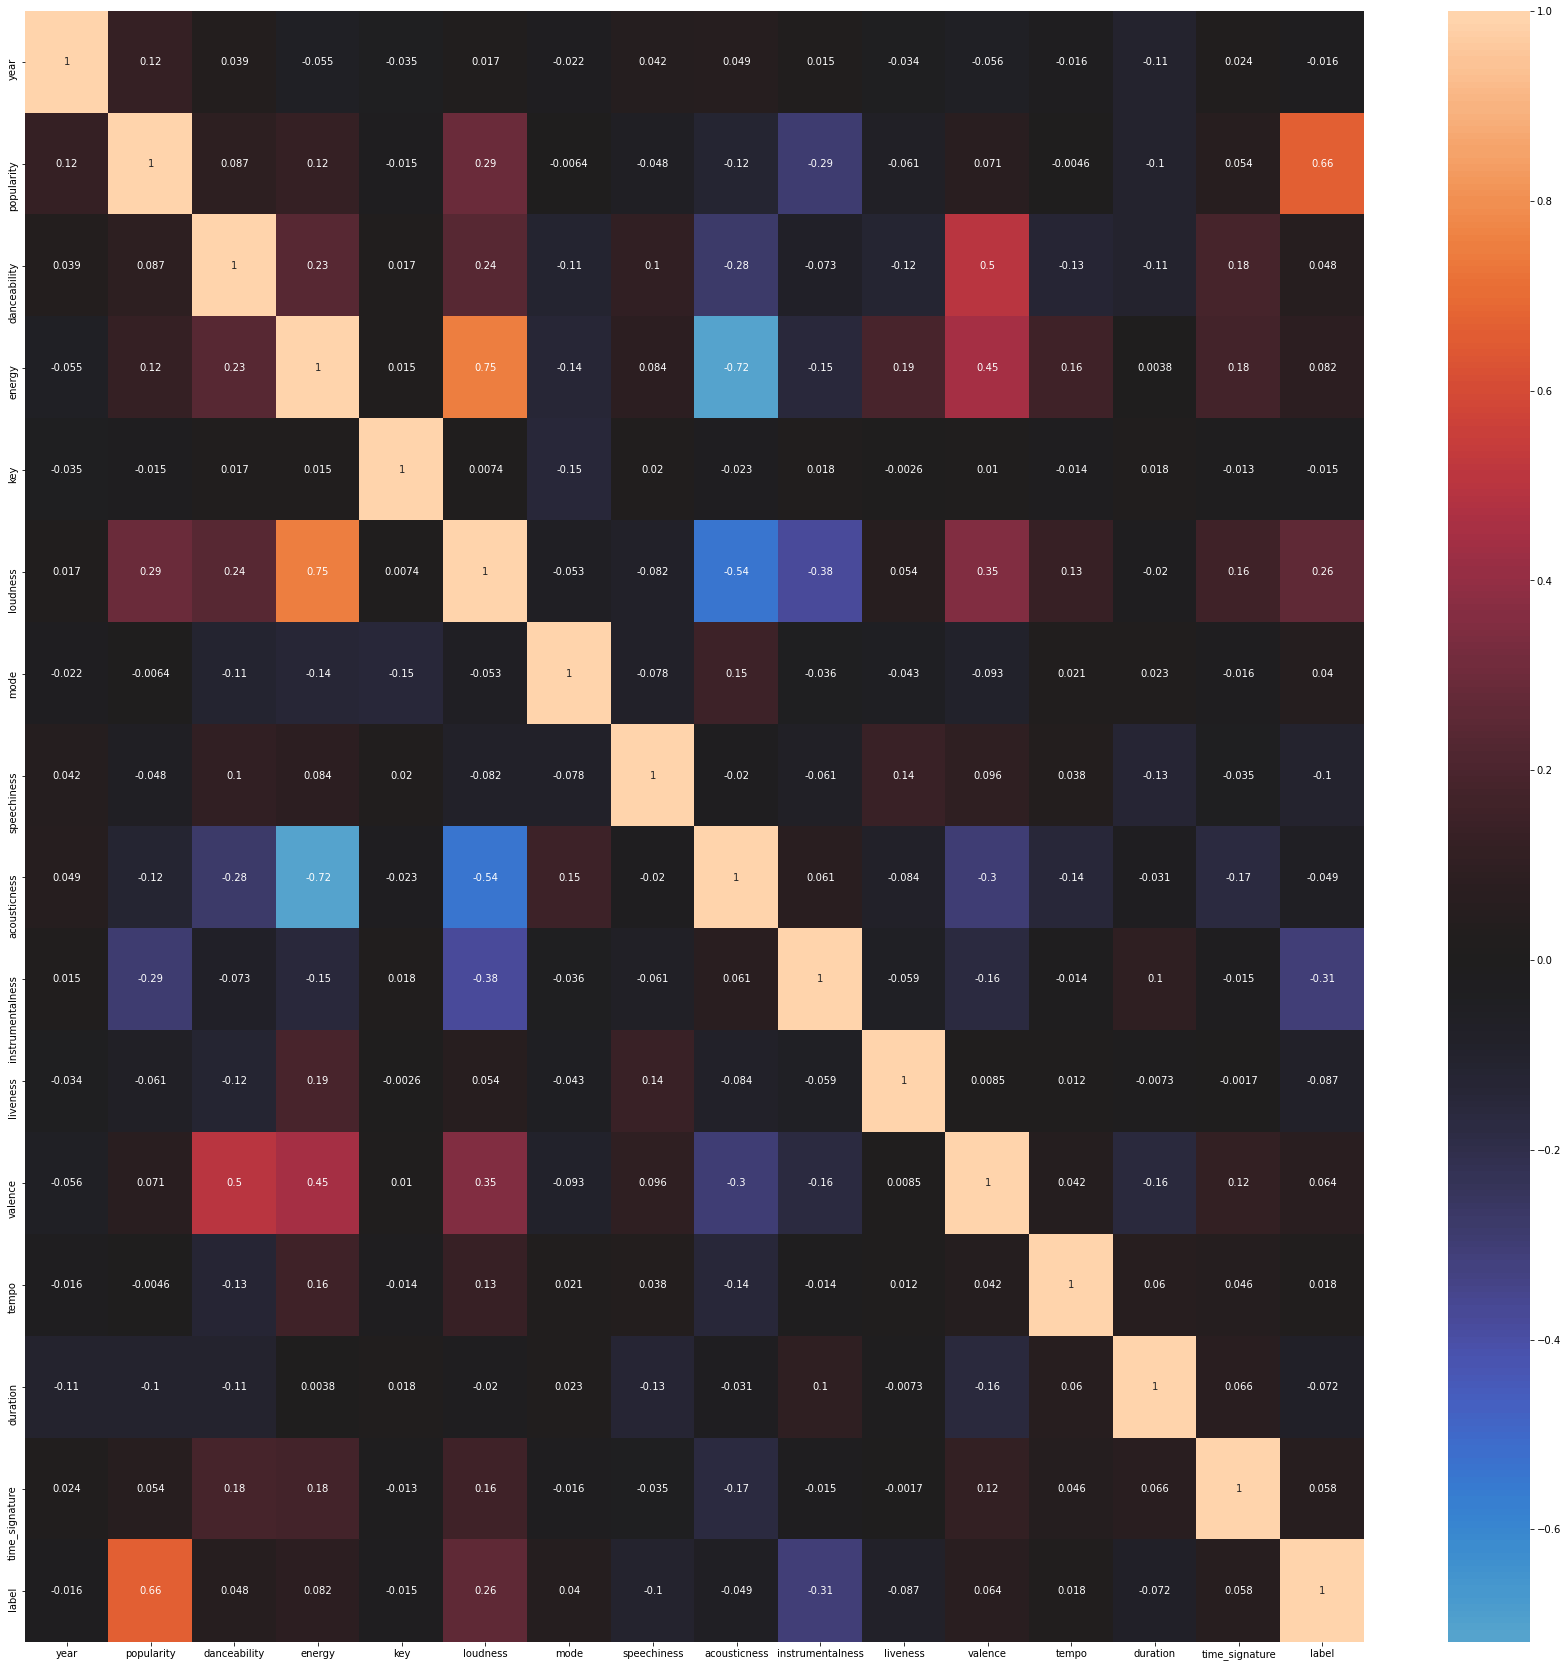

In [32]:
import matplotlib.pyplot as plt
import seaborn as sns
#視覺化
data_corr = data.corr()

plt.figure(figsize = (30,30))
sns.heatmap(data_corr,center=0, annot=True)

mp.show()


## 羅吉斯迴歸（解釋型）

In [6]:
# 準備資料

# result = sm.logit('label ~ danceability+key+loudness+mode+speechiness+acousticness+instrumentalness+liveness+valence+tempo+duration', data).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表


result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data).fit() # 建構迴歸模型
print(result.summary()) # 印出迴歸報表
# print(result)

# result = sm.logit('label ~ danceability+key+loudness+mode+speechiness+acousticness+instrumentalness+liveness+valence+tempo+duration', data).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表

Optimization terminated successfully.
         Current function value: 0.617129
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7861
Model:                          Logit   Df Residuals:                     7850
Method:                           MLE   Df Model:                           10
Date:                Thu, 08 Jun 2023   Pseudo R-squ.:                  0.1075
Time:                        17:56:07   Log-Likelihood:                -4851.3
converged:                       True   LL-Null:                       -5435.8
Covariance Type:            nonrobust   LLR p-value:                6.875e-245
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.5168      0.215      2.401      0.016       0.095       0.939
danceabilit

In [51]:
results_as_html = result.summary().tables[1].as_html()
pd.read_html(results_as_html, header=0, index_col=0)[0]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,0.5168,0.215,2.401,0.016,0.095,0.939
danceability,0.3461,0.201,1.722,0.085,-0.048,0.740
key,-0.0019,0.007,-0.273,0.785,-0.015,0.011
mode,0.1259,0.052,2.410,0.016,0.024,0.228
energy,0.8818,0.138,6.384,0.000,0.611,1.153
speechiness,-3.4449,0.334,-10.315,0.000,-4.099,-2.790
instrumentalness,-4.0424,0.204,-19.804,0.000,-4.443,-3.642
liveness,-1.2894,0.147,-8.747,0.000,-1.578,-1.001
valence,-0.2939,0.136,-2.164,0.030,-0.560,-0.028
tempo,0.0014,0.001,1.576,0.115,-0.000,0.003


In [46]:
# 只有顯著變數

result = sm.logit('label ~ mode+speechiness+instrumentalness+liveness+valence+duration', data).fit() # 建構迴歸模型
print(result.summary()) # 印出迴歸報表

Optimization terminated successfully.
         Current function value: 0.620324
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                 7861
Model:                          Logit   Df Residuals:                     7854
Method:                           MLE   Df Model:                            6
Date:                Tue, 30 May 2023   Pseudo R-squ.:                  0.1029
Time:                        14:33:08   Log-Likelihood:                -4876.4
converged:                       True   LL-Null:                       -5435.8
Covariance Type:            nonrobust   LLR p-value:                1.773e-238
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.1841      0.136      8.684      0.000       0.917       1.451
mode       

In [42]:
# 2021
data_2017 = data.loc[(data['year'] == 2019)] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_2017).fit() # 建構迴歸模型
print(result.summary()) # 印出迴歸報表

Optimization terminated successfully.
         Current function value: 0.569850
         Iterations 8
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  463
Model:                          Logit   Df Residuals:                      452
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 May 2023   Pseudo R-squ.:                  0.1761
Time:                        22:26:49   Log-Likelihood:                -263.84
converged:                       True   LL-Null:                       -320.25
Covariance Type:            nonrobust   LLR p-value:                 1.437e-19
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -1.0763      0.984     -1.094      0.274      -3.005       0.852
danceabilit

In [43]:
# 2020
data_2011 = data.loc[(data['year'] == 2012)] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_2011).fit() # 建構迴歸模型
print(result.summary()) # 印出迴歸報表

Optimization terminated successfully.
         Current function value: 0.607042
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  593
Model:                          Logit   Df Residuals:                      582
Method:                           MLE   Df Model:                           10
Date:                Sun, 28 May 2023   Pseudo R-squ.:                  0.1212
Time:                        22:30:17   Log-Likelihood:                -359.98
converged:                       True   LL-Null:                       -409.62
Covariance Type:            nonrobust   LLR p-value:                 7.580e-17
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.4983      0.747      0.667      0.505      -0.965       1.962
danceabilit

In [17]:
# 2019
data_2019 = data.loc[(data['year'] == 2019)] 
result = sm.logit('label ~ danceability+energy+key+loudness+mode+speechiness+acousticness+instrumentalness+liveness+valence+tempo+duration', data_2019).fit() # 建構迴歸模型
print(result.summary()) # 印出迴歸報表

Optimization terminated successfully.
         Current function value: 0.547381
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                  label   No. Observations:                  463
Model:                          Logit   Df Residuals:                      450
Method:                           MLE   Df Model:                           12
Date:                Sun, 28 May 2023   Pseudo R-squ.:                  0.2086
Time:                        21:13:50   Log-Likelihood:                -253.44
converged:                       True   LL-Null:                       -320.25
Covariance Type:            nonrobust   LLR p-value:                 1.151e-22
                       coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            3.5014      1.548      2.262      0.024       0.468       6.535
danceabilit

In [98]:
# 華
data_hua = data.loc[(data['language'] == '華語')] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_hua).fit() # 建構迴歸模型
df1 = result.summary2().tables[1]
df1.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df1.columns = ["華語coef", "華語P"]
# df = df.rename(columns={'Coef.': '華語coef','P>|z|':'華語P'})
df1


Optimization terminated successfully.
         Current function value: 0.622257
         Iterations 7


,華語coef,華語P
Intercept,-1.692497,0.011037
danceability,1.711064,0.004549
key,-0.000591,0.975194
mode,0.412473,0.013072
energy,-0.618883,0.135893
speechiness,-3.934592,0.000414
instrumentalness,-3.809820,0.000001
liveness,-0.704293,0.144178
valence,-0.748994,0.069460
tempo,0.007034,0.005761


In [102]:
# 西
data_eng = data.loc[(data['language'] == '西洋')] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df2 = (result.summary2().tables[1])
df2.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df2 = df2.rename(columns={'Coef.': '西洋coef','P>|z|':'西洋P'})
df = pd.concat([df1,df2],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.612769
         Iterations 7


,華語coef,華語P,西洋coef,西洋P
Intercept,-1.692497,0.011037,0.377307,2.033823e-01
danceability,1.711064,0.004549,0.724038,1.234886e-02
key,-0.000591,0.975194,-0.012069,2.325646e-01
mode,0.412473,0.013072,0.079481,2.972307e-01
energy,-0.618883,0.135893,1.081986,9.242055e-08
speechiness,-3.934592,0.000414,-2.813080,9.338686e-11
instrumentalness,-3.809820,0.000001,-4.065748,1.919709e-40
liveness,-0.704293,0.144178,-0.910187,5.748039e-05
valence,-0.748994,0.069460,-0.534319,5.504258e-03
tempo,0.007034,0.005761,0.001973,1.463135e-01


## 羅吉斯迴歸（預測型）

In [103]:
# 台
data_eng = data.loc[(data['language'] == '台語')] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df3 = (result.summary2().tables[1])
df3.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df3 = df3.rename(columns={'Coef.': '台語coef','P>|z|':'台語P'})
df = pd.concat([df,df3],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.620025
         Iterations 11


,華語coef,華語P,西洋coef,西洋P,台語coef,台語P
Intercept,-1.692497,0.011037,0.377307,2.033823e-01,2.689229,0.039929
danceability,1.711064,0.004549,0.724038,1.234886e-02,-0.924484,0.426729
key,-0.000591,0.975194,-0.012069,2.325646e-01,-0.057033,0.075635
mode,0.412473,0.013072,0.079481,2.972307e-01,0.112856,0.667323
energy,-0.618883,0.135893,1.081986,9.242055e-08,0.000709,0.999297
speechiness,-3.934592,0.000414,-2.813080,9.338686e-11,-0.262720,0.883740
instrumentalness,-3.809820,0.000001,-4.065748,1.919709e-40,-95.328294,0.135977
liveness,-0.704293,0.144178,-0.910187,5.748039e-05,-0.055539,0.952351
valence,-0.748994,0.069460,-0.534319,5.504258e-03,-1.333717,0.106304
tempo,0.007034,0.005761,0.001973,1.463135e-01,-0.005486,0.225620


In [105]:
# 台
data_eng = data.loc[(data['language'] == '日語')] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df4 = (result.summary2().tables[1])
df4.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df4 = df4.rename(columns={'Coef.': '日語coef','P>|z|':'日語P'})
df = pd.concat([df1,df2,df3,df4],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.608474
         Iterations 6


,華語coef,華語P,西洋coef,西洋P,台語coef,台語P,日語coef,日語P
Intercept,-1.692497,0.011037,0.377307,2.033823e-01,2.689229,0.039929,0.418158,5.423657e-01
danceability,1.711064,0.004549,0.724038,1.234886e-02,-0.924484,0.426729,-1.368053,2.140395e-02
key,-0.000591,0.975194,-0.012069,2.325646e-01,-0.057033,0.075635,0.029254,1.500101e-01
mode,0.412473,0.013072,0.079481,2.972307e-01,0.112856,0.667323,-0.048449,7.568348e-01
energy,-0.618883,0.135893,1.081986,9.242055e-08,0.000709,0.999297,2.749039,8.039841e-10
speechiness,-3.934592,0.000414,-2.813080,9.338686e-11,-0.262720,0.883740,-3.595781,3.705705e-03
instrumentalness,-3.809820,0.000001,-4.065748,1.919709e-40,-95.328294,0.135977,-2.935237,4.087540e-13
liveness,-0.704293,0.144178,-0.910187,5.748039e-05,-0.055539,0.952351,-1.249931,4.875815e-03
valence,-0.748994,0.069460,-0.534319,5.504258e-03,-1.333717,0.106304,-0.214784,6.062366e-01
tempo,0.007034,0.005761,0.001973,1.463135e-01,-0.005486,0.225620,-0.001720,5.156545e-01


In [106]:
# 韓
data_eng = data.loc[(data['language'] == '韓語')] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df5 = (result.summary2().tables[1])
df5.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df5 = df5.rename(columns={'Coef.': '韓語coef','P>|z|':'韓語P'})
df = pd.concat([df,df5],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.574836
         Iterations 7


,華語coef,華語P,西洋coef,西洋P,台語coef,台語P,日語coef,日語P,韓語coef,韓語P
Intercept,-1.692497,0.011037,0.377307,2.033823e-01,2.689229,0.039929,0.418158,5.423657e-01,1.032185,5.051501e-02
danceability,1.711064,0.004549,0.724038,1.234886e-02,-0.924484,0.426729,-1.368053,2.140395e-02,0.817169,7.283501e-02
key,-0.000591,0.975194,-0.012069,2.325646e-01,-0.057033,0.075635,0.029254,1.500101e-01,0.010369,4.597732e-01
mode,0.412473,0.013072,0.079481,2.972307e-01,0.112856,0.667323,-0.048449,7.568348e-01,0.211473,4.926373e-02
energy,-0.618883,0.135893,1.081986,9.242055e-08,0.000709,0.999297,2.749039,8.039841e-10,0.796493,1.326988e-02
speechiness,-3.934592,0.000414,-2.813080,9.338686e-11,-0.262720,0.883740,-3.595781,3.705705e-03,-5.037336,2.273654e-12
instrumentalness,-3.809820,0.000001,-4.065748,1.919709e-40,-95.328294,0.135977,-2.935237,4.087540e-13,-4.528521,4.781243e-24
liveness,-0.704293,0.144178,-0.910187,5.748039e-05,-0.055539,0.952351,-1.249931,4.875815e-03,-1.942492,1.706635e-12
valence,-0.748994,0.069460,-0.534319,5.504258e-03,-1.333717,0.106304,-0.214784,6.062366e-01,0.600954,4.185412e-02
tempo,0.007034,0.005761,0.001973,1.463135e-01,-0.005486,0.225620,-0.001720,5.156545e-01,-0.000845,6.727233e-01


In [107]:
df.to_csv("language_analysis.csv", index=False)

In [121]:
# 韓
data_eng = data.loc[(data['year'] == (2021 or 2020 or 2019 or 2018 or 2017))] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df1 = (result.summary2().tables[1])
df1.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df = df1.rename(columns={'Coef.': '2021coef','P>|z|':'2021P'})
df

Optimization terminated successfully.
         Current function value: 0.617832
         Iterations 7


,2021coef,2021P
Intercept,0.390379,0.671222
danceability,-1.013926,0.218541
key,-0.004714,0.860466
mode,0.666749,0.001422
energy,0.952062,0.080770
speechiness,-5.238692,0.000270
instrumentalness,-3.271154,0.000013
liveness,0.235161,0.741214
valence,0.578977,0.283788
tempo,0.000954,0.783905


In [122]:
# 韓
data_eng = data.loc[(data['year'] == (2016 or 2015 or 2014 or 2013 or 2012))] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df2 = (result.summary2().tables[1])
df2.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df2 = df2.rename(columns={'Coef.': '2016coef','P>|z|':'2016P'})
df = pd.concat([df,df2],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.594904
         Iterations 7


,2021coef,2021P,2016coef,2016P
Intercept,0.390379,0.671222,2.096805,1.590140e-02
danceability,-1.013926,0.218541,0.404468,5.875825e-01
key,-0.004714,0.860466,-0.012593,5.971439e-01
mode,0.666749,0.001422,0.336703,6.817703e-02
energy,0.952062,0.080770,0.675706,2.011621e-01
speechiness,-5.238692,0.000270,-3.627266,1.593951e-03
instrumentalness,-3.271154,0.000013,-4.011057,4.055757e-09
liveness,0.235161,0.741214,-1.238979,9.807890e-03
valence,0.578977,0.283788,-0.102626,8.341247e-01
tempo,0.000954,0.783905,-0.002002,5.317219e-01


In [123]:
# 韓
data_eng = data.loc[(data['year'] == (2011 or 2010 or 2009 or 2008 or 2007))] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df3 = (result.summary2().tables[1])
df3.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df3 = df3.rename(columns={'Coef.': '2011coef','P>|z|':'2011P'})
df = pd.concat([df,df3],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.567121
         Iterations 7


,2021coef,2021P,2016coef,2016P,2011coef,2011P
Intercept,0.390379,0.671222,2.096805,1.590140e-02,2.734920,2.706451e-03
danceability,-1.013926,0.218541,0.404468,5.875825e-01,1.312532,7.822008e-02
key,-0.004714,0.860466,-0.012593,5.971439e-01,-0.038822,1.247456e-01
mode,0.666749,0.001422,0.336703,6.817703e-02,0.096911,6.230350e-01
energy,0.952062,0.080770,0.675706,2.011621e-01,1.196989,2.249936e-02
speechiness,-5.238692,0.000270,-3.627266,1.593951e-03,-3.224814,1.197779e-02
instrumentalness,-3.271154,0.000013,-4.011057,4.055757e-09,-5.081931,2.389266e-10
liveness,0.235161,0.741214,-1.238979,9.807890e-03,-1.522123,6.086382e-03
valence,0.578977,0.283788,-0.102626,8.341247e-01,-1.677228,1.445544e-03
tempo,0.000954,0.783905,-0.002002,5.317219e-01,0.003676,3.056710e-01


### 使用預設的門檻值（0.5）

In [124]:
# 韓
data_eng = data.loc[(data['year'] == (2006 or 2005 or 2004 or 2003 or 2002 or 2001 or 2000 or 1999 or 1998))] 
result = sm.logit('label ~ danceability+key+mode+energy+speechiness+instrumentalness+liveness+valence+tempo+duration', data_eng).fit() # 建構迴歸模型
# print(result.summary()) # 印出迴歸報表
df4 = (result.summary2().tables[1])
df4.drop(columns = ['Std.Err.','z','[0.025','0.975]'],inplace = True)
df4 = df4.rename(columns={'Coef.': '2006coef','P>|z|':'2006P'})
df = pd.concat([df,df4],axis=1)
df

Optimization terminated successfully.
         Current function value: 0.453687
         Iterations 8


,2021coef,2021P,2016coef,2016P,2011coef,2011P,2006coef,2006P
Intercept,0.390379,0.671222,2.096805,1.590140e-02,2.734920,2.706451e-03,0.401890,0.922311
danceability,-1.013926,0.218541,0.404468,5.875825e-01,1.312532,7.822008e-02,3.026535,0.364306
key,-0.004714,0.860466,-0.012593,5.971439e-01,-0.038822,1.247456e-01,0.214768,0.085943
mode,0.666749,0.001422,0.336703,6.817703e-02,0.096911,6.230350e-01,1.131264,0.234888
energy,0.952062,0.080770,0.675706,2.011621e-01,1.196989,2.249936e-02,-1.242613,0.586684
speechiness,-5.238692,0.000270,-3.627266,1.593951e-03,-3.224814,1.197779e-02,0.723877,0.923511
instrumentalness,-3.271154,0.000013,-4.011057,4.055757e-09,-5.081931,2.389266e-10,-11.760316,0.029979
liveness,0.235161,0.741214,-1.238979,9.807890e-03,-1.522123,6.086382e-03,8.819347,0.048027
valence,0.578977,0.283788,-0.102626,8.341247e-01,-1.677228,1.445544e-03,-1.758467,0.422942
tempo,0.000954,0.783905,-0.002002,5.317219e-01,0.003676,3.056710e-01,-0.037863,0.067095


In [7]:
# 準備資料
cancel = data['is_late_cancel'] 
X = data.drop(["is_late_cancel"], axis = 1)
X = X.drop(["age"], axis = 1)
X = X.drop(["age_group"], axis = 1)
X = X.drop(["examination_date"], axis = 1)
X = X.drop(["exam_month"], axis = 1)
X = X.drop(["exam_weekday"], axis = 1)
X = X.drop(["group_size"], axis = 1)
month = pd.get_dummies(data["exam_month"]) 
weekday = pd.get_dummies(data["exam_weekday"])  
X = pd.concat([X, month, weekday], axis = 1)
# 隨機切分訓練、驗證
train_X, valid_X, train_y, valid_y = train_test_split(X, cancel, test_size = 0.25) 

# 手動切分訓練、驗證
# train_X = X[:30, :]
# valid_X = X[30:, :]
# train_y = survival[:30]
# valid_y = survival[30:]

# 用訓練資料建構 Logistic regression 模型
glm = LogisticRegression()
glm.fit(train_X, train_y)
print("Model parameters:")
print(glm.coef_)
print(glm.intercept_ )

Model parameters:
[[-3.20005916e-02 -3.34439707e-01 -8.25972144e-02 -4.10716837e-01
  -2.28456840e-06 -8.91613025e-01 -2.40342485e-01 -2.76716554e-01
  -1.27618906e-01 -5.57508880e-03 -6.29151251e-02 -8.48100623e-02
  -1.30168227e-01 -9.40847479e-02 -9.11832043e-02 -8.66719595e-02
  -7.63745058e-02 -4.90684197e-02 -5.26932906e-02 -6.16410976e-02
  -3.12234950e-02 -9.26172975e-02 -1.61862243e-01 -1.84717384e-01
  -1.39403389e-01 -1.50751862e-01 -9.99368151e-02 -1.76779514e-01
  -2.24794739e-07]]
[-0.91345186]


In [125]:
df.to_csv("year.csv", index=False)

In [8]:
# 做預測（順便看看估計的 y = 1 的機率）
predicted_y = glm.predict(valid_X)
estimated_prob = glm.predict_proba(valid_X)[:,1]
print("estimated Pr(y = 1):\n", estimated_prob) 

estimated Pr(y = 1):
 [0.03993586 0.02063413 0.03089708 ... 0.02146358 0.02755223 0.01427247]


In [9]:
# 用驗證資料建構 confusion matrix
print("predicted y:", list(predicted_y))
print("true y:     ", list(valid_y))
cm = metrics.confusion_matrix(valid_y, predicted_y)
print()
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])

predicted y: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [10]:
# 預測成效
accuracy = metrics.accuracy_score(valid_y, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(valid_y, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(valid_y, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(valid_y, predicted_y)
print("F1 score =", f1_score)

accuracy = 0.9658444022770398
precision = 0.0
recall = 0.0
F1 score = 0.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 調整門檻值

In [11]:
# 用自訂的門檻值建構 confusion matrix
estimated_prob = glm.predict_proba(valid_X)[:,1]
print("estimated Pr(y = 1):\n", estimated_prob) 

# 手動設定門檻值
threshold = 0.3

# 手動產生預測結果
predicted_y = []
for p in estimated_prob:
    if p >= threshold:
        predicted_y.append(1)
    else:
        predicted_y.append(0)

estimated Pr(y = 1):
 [0.03993586 0.02063413 0.03089708 ... 0.02146358 0.02755223 0.01427247]


In [12]:
# 用驗證資料建構 confusion matrix
print("predicted y:", list(predicted_y))
print("true y:     ", list(valid_y))
cm = metrics.confusion_matrix(valid_y, predicted_y)
print()
print("                    true positive  true negative")
print("predicted positive:            ", cm[1][1], "            ", cm[0][1])
print("predicted negative:            ", cm[1][0], "            ", cm[0][0])
print("=============================")

predicted y: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [13]:
# 預測成效
accuracy = metrics.accuracy_score(valid_y, predicted_y)
print("accuracy =", accuracy)
precision = metrics.precision_score(valid_y, predicted_y)
print("precision =", precision)
recall = metrics.recall_score(valid_y, predicted_y)
print("recall =", recall)
f1_score = metrics.f1_score(valid_y, predicted_y)
print("F1 score =", f1_score)

accuracy = 0.9658444022770398
precision = 0.0
recall = 0.0
F1 score = 0.0


C:\Users\HP\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


### 繪製 ROC 曲線、計算 AUC

[1.5879827  0.5879827  0.42888401 0.33454946 0.29981288 0.27343036
 0.22827951 0.16529793 0.10901385 0.02593981]


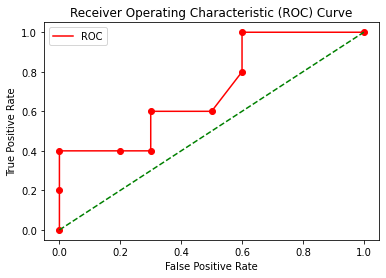

AUC = 0.71


In [195]:
fp_rates, tp_rates, thresholds = metrics.roc_curve(valid_y, estimated_prob)

print(thresholds)

plt.plot(fp_rates, tp_rates, 'o', color = 'red')
plt.plot(fp_rates, tp_rates, color = 'red', label = 'ROC')
plt.plot([0, 1], [0, 1], color = 'green', linestyle = '--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

auc = metrics.auc(fp_rates, tp_rates)
print("AUC =", auc)

### 附帶一提：Regularization

sklearn.linear_model.LogisticRegression() 預設就有做 regularization（懲罰模型複雜度），可以用「C」這個參數調整懲罰的強度，歡迎大家自行參閱文件